In [1]:
import json
import pandas as pd
import csv

# Define the file path for the JSON file
json_file_path = 'StreamTwitDB.json'
csv_file_path = 'filtered_telco_tweets.csv'

# Define the columns we want to extract
columns = [
    'created_at', 'timestamp_ms', 'id', 'lang', 'text', 'user_id', 'user_name', 'user_followers_count', 'possibly_sensitive'
]

# Initialize a list to hold the extracted data
data = []

# Open the JSON file and process each line
with open(json_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        if not line:
            continue  # Skip blank lines
        try:
            tweet = json.loads(line)
            
            # Extract the necessary fields
            extracted_data = {
                'created_at': tweet.get('created_at'),
                'timestamp_ms': tweet.get('timestamp_ms'),
                'id': tweet.get('id'),
                'lang': tweet.get('lang'),
                'text': tweet.get('text'),
                'user_id': tweet['user'].get('id'),
                'user_name': tweet['user'].get('screen_name'),
                'user_followers_count': tweet['user'].get('followers_count'),
                'possibly_sensitive': tweet.get('possibly_sensitive')
            }
            
            # Append the extracted data to the list
            data.append(extracted_data)
        
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
        except KeyError as e:
            print(f"Missing key: {e}")

# Convert the list of extracted data to a DataFrame
df = pd.DataFrame(data, columns=columns)

# Save the DataFrame to a CSV file with proper quoting for multiline text
df.to_csv(csv_file_path, index=False, quoting=csv.QUOTE_ALL)

print(f"Data has been saved to '{csv_file_path}'")

Data has been saved to 'filtered_telco_tweets.csv'


In [2]:
# Read the CSV file with proper quoting to cater the case where 'text' column contains multiline text
df = pd.read_csv('filtered_telco_tweets.csv', quoting=csv.QUOTE_ALL)
print(df)

                           created_at   timestamp_ms                  id lang  \
0      Wed Jul 08 05:38:42 +0000 2015  1436333922742  618655427950084096   in   
1      Wed Jul 08 05:39:14 +0000 2015  1436333954696  618655561974878209   in   
2      Wed Jul 08 05:39:58 +0000 2015  1436333998792  618655746926866432   in   
3      Wed Jul 08 05:42:04 +0000 2015  1436334124945  618656276050939904   en   
4      Wed Jul 08 05:42:18 +0000 2015  1436334138123  618656331323457536   en   
...                               ...            ...                 ...  ...   
52353  Tue Sep 08 13:18:10 +0000 2015  1441718290490  641239103132975104   en   
52354  Tue Sep 08 13:18:20 +0000 2015  1441718300092  641239143406768128   en   
52355  Tue Sep 08 13:19:11 +0000 2015  1441718351038  641239357089714176   en   
52356  Tue Sep 08 13:19:19 +0000 2015  1441718359104  641239390920904704   en   
52357  Tue Sep 08 13:19:28 +0000 2015  1441718368246  641239429265403905   en   

                           

In [3]:
# Find duplicated rows based on column 'text'
duplicated_rows = df[df.duplicated(subset='text', keep=False)]

# Count duplicated rows
print('Total duplicated rows:')
print(duplicated_rows['text'].count())
print('')
print('Unique values for each column:')
print(duplicated_rows.nunique())

Total duplicated rows:
16734

Unique values for each column:
created_at              16248
timestamp_ms            16709
id                      16732
lang                       13
text                     1708
user_id                 10171
user_name               10189
user_followers_count     2969
possibly_sensitive          2
dtype: int64


In [ ]:
# Sort the DataFrame by column 'text'
df_sorted = duplicated_rows.sort_values(by=['text'], ascending=[True])

# Display duplicated rows sorted so we can see the duplicated text next to each other
with pd.option_context('display.max_colwidth', None, 'display.max_rows', None):
    print(df_sorted['text'])

In [5]:
# Sort the DataFrame by column 'text' and then by column 'user_followers_count' in descending order
df_sorted = df.sort_values(by=['text', 'user_followers_count'], ascending=[True, False])

# Drop duplicates based on column 'text' and keep the first occurrence (which has the highest 'user_followers_count' due to sorting)
df_deduplicated = df_sorted.drop_duplicates(subset='text', keep='first')

# Reset the index for clean output
df_deduplicated.reset_index(drop=True, inplace=True)

# Display the result
print("\nDataFrame after keeping rows with highest 'user_followers_count' for each duplicate in 'text':")
print(df_deduplicated)


DataFrame after keeping rows with highest 'user_followers_count' for each duplicate in 'text':
                           created_at   timestamp_ms                  id lang  \
0      Tue Jul 14 09:08:39 +0000 2015  1436864919324  620882589037899776   ja   
1      Tue Jul 14 04:53:10 +0000 2015  1436849590381  620818294790983681   ja   
2      Tue Jul 14 05:57:37 +0000 2015  1436853457812  620834515972304897   ja   
3      Fri Jul 10 08:30:16 +0000 2015  1436517016899  619423380505112578   ja   
4      Wed Aug 05 16:03:08 +0000 2015  1438790588187  628959429652840448   en   
...                               ...            ...                 ...  ...   
37327  Wed Jul 22 17:05:11 +0000 2015  1437584711792  623901617465659392   en   
37328  Thu Aug 20 20:13:15 +0000 2015  1440101595330  634458192156753920   en   
37329  Sat Jul 11 07:11:16 +0000 2015  1436598676182  619765884362563584   ro   
37330  Sat Jul 11 04:50:48 +0000 2015  1436590248891  619730537742254080   en   
37331  Mon Au

In [6]:
# These text are from language that will be dropped but they are actually in Malay so we will keep it
text_kept = [
    "@ariffhuzaifahh maxis cam cibei......",
    "@nablhah 😂😂😂 maafla line maxis cam harem do huhu",
    "Dem u unifi",
    "@fatimaradiyah limited internet data. I miss unifi 😩",
    "internet maxis ni before and after limit sama je speed.4g terpantas konon",
    "@arcx13 unifi naik 20 ugh",
    "Dasar taik 💩💩. Hahaha https://t.co/ky621Xqir8",
    "kat kolej line maxis ok. bila balik bilik sewa line cam haprakkkk",
    "Lapsap unifi 😑😑",
    "Lembs laa sia tenet maxis ni.",
    "#umobile line mmg worst ever..kat kl blh xde line...😡😡",
    "@IkaJamaludinn pfffttt. Maxis FTW!",
    "Line maxis macamm haremmmmn 😭😭",
    "Line maxis ni cam siel lah",
    "Rip umobile. Line internet E ja 😂",
    "Umobile free je wehhh",
    "line maxis gg",
    "pakage Unlimited Mobile Internet (UMI) umobile ok x?sbln 30 http://t.co/mOyeSCbj6Y"
]

rows_kept = df_deduplicated[df_deduplicated['text'].isin(text_kept)]

print(rows_kept)

                           created_at   timestamp_ms                  id lang  \
1344   Sun Jul 12 14:43:16 +0000 2015  1436712196403  620242022679445504   de   
3315   Tue Jul 14 06:54:00 +0000 2015  1436856840380  620848703490801664   de   
7638   Fri Jul 10 09:31:37 +0000 2015  1436520697318  619438817301262336   cy   
7655   Sat Jul 11 08:43:27 +0000 2015  1436604207819  619789085729644544   pt   
8431   Sun Jul 12 14:59:04 +0000 2015  1436713144042  620245997365522432   da   
9627   Mon Jul 13 15:47:06 +0000 2015  1436802426778  620620476302241792   pt   
15389  Sat Jul 11 07:36:31 +0000 2015  1436600191165  619772238661705728   lv   
15508  Mon Jul 13 07:59:02 +0000 2015  1436774342404  620502681900072960   pt   
20046  Tue Jul 14 12:13:27 +0000 2015  1436876007223  620929095057059841   lv   
20130  Sat Jul 11 16:08:48 +0000 2015  1436630928532  619901160523083776   fi   
20468  Thu Jul 09 16:13:04 +0000 2015  1436458384368  619177457845809152   de   
20514  Wed Jul 08 12:34:09 +

In [7]:
# Only keep these lang type to remove non-malay twweets
lang_kept = [
    'en',
    'in',
    'tl',
    'ht',
    'sk',
    'zh',
    'et',
    'ro',
    'nl',
    'pl',
    'hr',
    'tr',
    'ar'
]

df_deduplicated = df_deduplicated[df_deduplicated['lang'].isin(lang_kept)]

In [8]:
# Append rows_kept to df_deduplicated
df_deduplicated = pd.concat([df_deduplicated, rows_kept])

df_deduplicated = df_deduplicated.sort_values(by=['possibly_sensitive', 'lang', 'user_followers_count'], ascending=[False, True, False])

print(df_deduplicated)

                           created_at   timestamp_ms                  id lang  \
7638   Fri Jul 10 09:31:37 +0000 2015  1436520697318  619438817301262336   cy   
2310   Sun Jul 12 06:21:14 +0000 2015  1436682074703  620115683112685568   en   
2311   Sun Jul 12 06:24:17 +0000 2015  1436682257730  620116450783531009   en   
3783   Thu Aug 27 04:28:33 +0000 2015  1440649713469  636757166259462145   en   
3784   Thu Aug 27 05:29:30 +0000 2015  1440653370232  636772503835185152   en   
...                               ...            ...                 ...  ...   
37136  Fri Jul 10 12:07:46 +0000 2015  1436530066865  619478116029870080   zh   
20841  Thu Jul 09 04:18:41 +0000 2015  1436415521040  618997676017713156   zh   
29767  Sat Jul 11 03:49:28 +0000 2015  1436586568048  619715099167559680   zh   
37127  Sun Jul 12 11:17:48 +0000 2015  1436699868422  620190315379474432   zh   
36408  Sun Jul 12 08:00:10 +0000 2015  1436688010088  620140577921859584   zh   

                           

In [9]:
df_deduplicated.to_csv('deduplicated_telco_tweet.csv', index=False)

print("DataFrame has been saved to 'deduplicated_telco_tweet.csv'")

DataFrame has been saved to 'deduplicated_telco_tweet.csv'


In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk

df = df_deduplicated

# Combine all text into a single string
text_combined = ' '.join(df['text'].astype(str))

# Process text: remove punctuation and convert to lowercase
text_processed = re.sub(r'[^\w\s]', '', text_combined.lower())

# Tokenize the text (split into words)
words = text_processed.split()

# Count word frequencies
word_counts = Counter(words)

# Filter the words with counts 600 and above
filtered_word_counts = {word: count for word, count in word_counts.items() if count >= 600}

# Create a DataFrame from the filtered word counts
df = pd.DataFrame(list(filtered_word_counts.items()), columns=['Word', 'Count'])

# Sort the DataFrame by count in descending order
df = df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(df)

                   Word  Count
0                 maxis  13155
1               umobile   9724
2                   the   8693
3                    to   7545
4                celcom   6390
5                     i   6203
6   freeinternetforlife   5940
7                   for   4899
8                 unifi   4838
9                     a   4549
10                   is   4358
11                  and   4031
12                  you   4012
13                 with   3446
14                   my   3359
15                   rt   3287
16                   in   3063
17             internet   2695
18                 line   2555
19                   of   2456
20                   on   2313
21                   it   2171
22                   me   2106
23                  can   2059
24                   ni   1926
25                 free   1808
26                   at   1801
27                 your   1791
28                 this   1767
29                  get   1681
30                   so   1561
31      

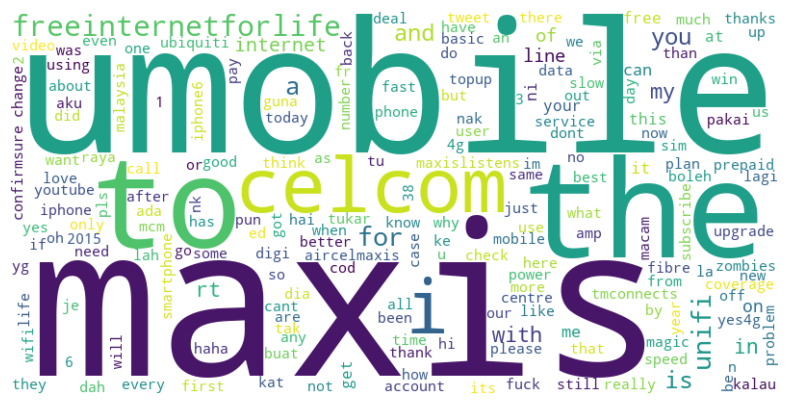

In [15]:
# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
import pandas as pd
import numpy as np

df = pd.read_csv('deduplicated_telco_tweet.csv', engine='python')
df.dtypes

created_at               object
timestamp_ms            float64
id                       object
lang                     object
text                     object
user_id                 float64
user_name                object
user_followers_count    float64
possibly_sensitive       object
dtype: object

In [47]:
df.columns = ['tweet_created_at', 'tweet_timestamp_ms', 'tweet_id_str', 'tweet_lang', 'tweet_text', 'user_id_str', 'user_screen_name', 'user_followers_count', 'tweet_possibly_sensitive']
df.count()

tweet_created_at            36259
tweet_timestamp_ms          36258
tweet_id_str                36258
tweet_lang                  36258
tweet_text                  36258
user_id_str                 36250
user_screen_name            36250
user_followers_count        36250
tweet_possibly_sensitive    36250
dtype: int64

In [48]:
# find rows where 'user_id_str' is NaN or missing
missing_rows = df[df['user_id_str'].isna()]

# display the full text of the 'tweet_text' column without truncation
print(missing_rows['tweet_text'].to_string(index=False))

                                    thank you erl.
                                             False
             Jaitley!! He's become a punching bag!
                                             False
I've tried so many word combos and I just cant ...
                                             False
I've tried so many word combos and I just cant ...
                                              None
                                             False


In [49]:
# We will remove the above rows as they are not important

# Drop rows where any column is empty (NaN)
df = df.dropna()

new_dtypes = {
    'tweet_created_at': str,
    'tweet_timestamp_ms': int,
    'tweet_id_str': str,
    'tweet_lang': str,
    'tweet_text': str,
    'tweet_possibly_sensitive': bool,
    'user_id_str': str,
    'user_screen_name': str,
    'user_followers_count': int
}

df = df.astype(new_dtypes)
df.dtypes

tweet_created_at            object
tweet_timestamp_ms           int64
tweet_id_str                object
tweet_lang                  object
tweet_text                  object
user_id_str                 object
user_screen_name            object
user_followers_count         int64
tweet_possibly_sensitive      bool
dtype: object

In [50]:
# move 'tweet_possibly_sensitive' column after 'tweet_text'
cols = df.columns.tolist()
cols.insert(cols.index('tweet_text') + 1, cols.pop(cols.index('tweet_possibly_sensitive')))
df = df[cols]
df.count()

tweet_created_at            36250
tweet_timestamp_ms          36250
tweet_id_str                36250
tweet_lang                  36250
tweet_text                  36250
tweet_possibly_sensitive    36250
user_id_str                 36250
user_screen_name            36250
user_followers_count        36250
dtype: int64

In [51]:
df.to_csv('telco_tweet.csv', index=False)
print('Final CSV saved')